In [2]:
#Opeining Dataset

import numpy as np
import pandas as pd

file_path=r"C:/Users/Vahe/Downloads/BNB_Historical_Data.csv"
df=pd.read_csv(file_path)
df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,627.58,593.80,637.75,593.20,588.65K,5.69%
1,05/01/2024,593.80,578.41,629.98,537.50,10.58M,2.66%
2,04/01/2024,578.41,606.69,627.68,510.84,19.61M,-4.69%
3,03/01/2024,606.89,399.10,641.80,362.15,42.88M,52.06%
4,02/01/2024,399.10,300.50,426.79,296.61,22.09M,32.81%
5,01/01/2024,300.50,312.00,333.69,287.60,26.58M,-3.69%
6,12/01/2023,312.00,227.60,337.89,226.00,32.06M,37.08%
7,11/01/2023,227.60,226.30,271.14,222.60,26.47M,0.57%
8,10/01/2023,226.30,214.50,237.49,202.99,13.76M,5.50%
9,09/01/2023,214.50,216.80,221.20,204.19,9.83M,-1.01%


In [3]:
#feature engeneering

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

def convert_volume(vol):
    if 'K' in vol:
        return float(vol.replace('K', '')) * 1e3
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1e6
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1e9
    else:
        return float(vol)

df['Vol.'] = df['Vol.'].apply(convert_volume)

df['Change %'] = df['Change %'].str.replace('%', '').astype(float) / 100.0


df['Price_Range'] = df['High'] - df['Low']  #The difference between the highest and lowest prices within a given time period
df['Price_Change'] = df['Price'] - df['Open'] #The change in price from one period to the next
df['Daily_Return'] = df['Price'].pct_change() * 100 #The percentage change in price from one day to the next

df['Volume_Change'] = df['Vol.'].pct_change() * 100 #The change in trading volume from one period to the next.

df['MA_7'] = df['Price'].rolling(window=7).mean() #The 7-day moving average of the price
df['MA_30'] = df['Price'].rolling(window=30).mean() #The 30-day moving average of the price

df['Vol_MA_7'] = df['Vol.'].rolling(window=7).mean() # The 7-day moving average of the trading volume.
df['Vol_MA_30'] = df['Vol.'].rolling(window=30).mean() #The 30-day moving average of the trading volume

df['Price_Volatility_7'] = df['Price'].rolling(window=7).std() # The standard deviation of the price over the last 7 days
df['Price_Volatility_30'] = df['Price'].rolling(window=30).std() # The standard deviation of the price over the last 30 days.

df['Lag_1'] = df['Price'].shift(1) #The price of the previous period (e.g., previous day).
df['Lag_2'] = df['Price'].shift(2) #The price of the period before the previous period (e.g., two days ago).
df = df.sort_values(by='Date').reset_index(drop=True)

df.head(100)

,Date,Price,Open,High,Low,Vol.,Change %,Price_Range,Price_Change,Daily_Return,Volume_Change,MA_7,MA_30,Vol_MA_7,Vol_MA_30,Price_Volatility_7,Price_Volatility_30,Lag_1,Lag_2
0,2017-12-01,8.53,1.95,11.30,1.88,32830000.0,3.3744,9.42,6.58,-24.580018,-57.573016,12.088571,15.314333,7.654143e+07,1.067170e+08,2.365505,6.895952,11.31,10.46
1,2018-01-01,11.31,8.53,24.64,7.80,77380000.0,0.3263,16.84,2.78,8.126195,13.062537,12.841429,15.543333,7.847571e+07,1.087223e+08,1.819876,6.775914,10.46,11.04
2,2018-02-01,10.46,11.31,11.85,0.00,68440000.0,-0.0757,11.85,-0.85,-5.253623,-37.406256,12.794286,15.855333,7.255143e+07,1.095397e+08,1.869749,6.789745,11.04,14.32
3,2018-03-01,11.04,10.46,14.93,7.07,109340000.0,0.0562,7.86,0.58,-22.905028,-1.031861,12.731429,16.277667,6.647571e+07,1.111157e+08,1.966210,6.836461,14.32,14.22
4,2018-04-01,14.32,11.05,15.90,10.32,110480000.0,0.2964,5.58,3.27,0.703235,83.582586,12.510000,16.887000,5.600714e+07,1.142717e+08,2.254573,7.160499,14.22,14.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2024-02-01,399.10,300.50,426.79,296.61,22090000.0,0.3281,130.18,98.60,-34.238495,-48.484142,NaN,NaN,NaN,NaN,NaN,NaN,606.89,578.41
75,2024-03-01,606.89,399.10,641.80,362.15,42880000.0,0.5206,279.65,207.79,4.923843,118.663947,NaN,NaN,NaN,NaN,NaN,NaN,578.41,593.80
76,2024-04-01,578.41,606.69,627.68,510.84,19610000.0,-0.0469,116.84,-28.28,-2.591782,85.349716,NaN,NaN,NaN,NaN,NaN,NaN,593.80,627.58
77,2024-05-01,593.80,578.41,629.98,537.50,10580000.0,0.0266,92.48,15.39,-5.382581,1697.332880,NaN,NaN,NaN,NaN,NaN,NaN,627.58,NaN


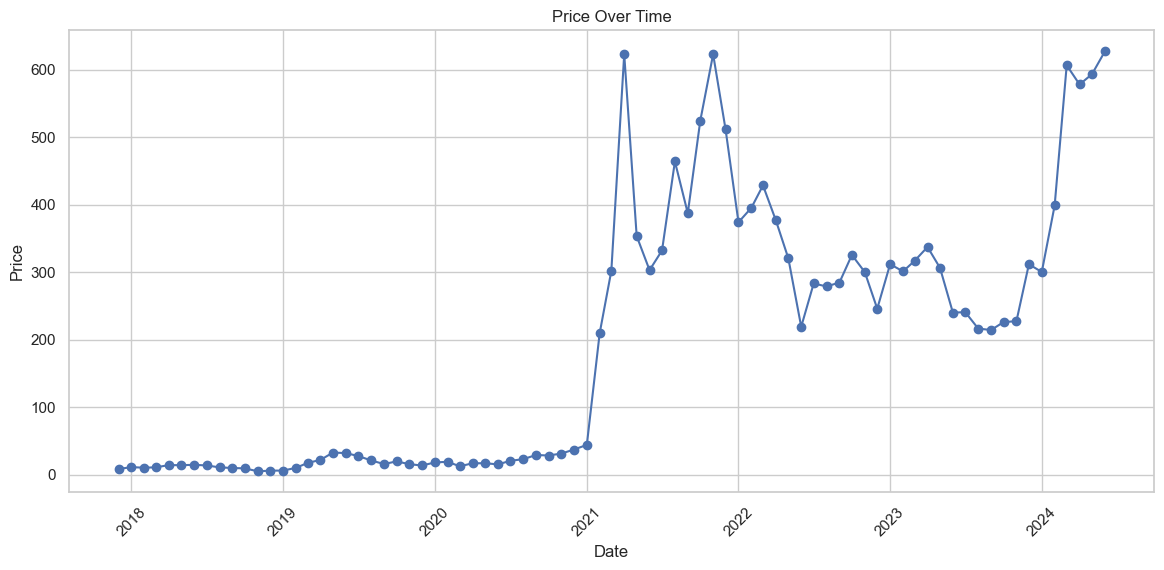

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

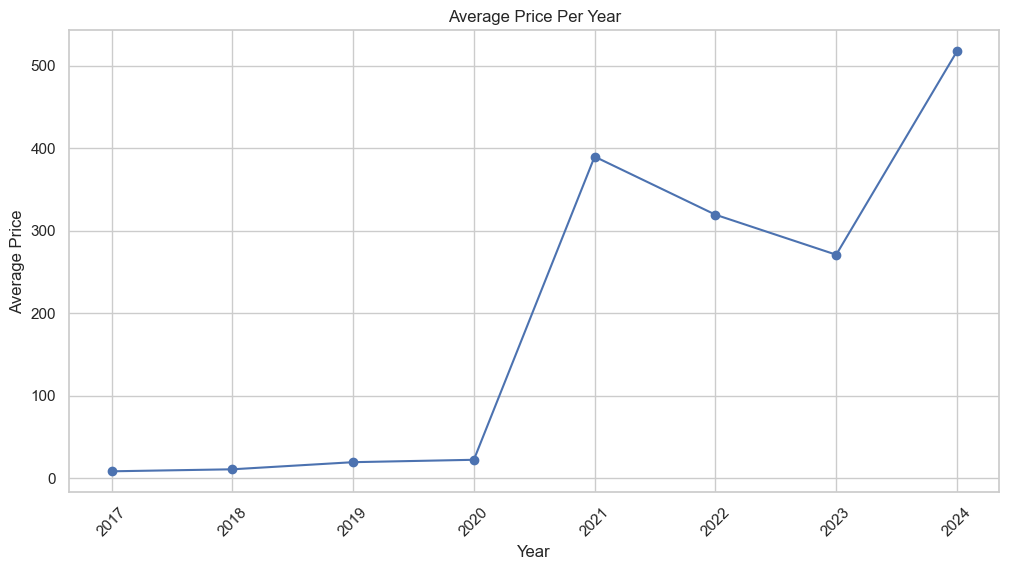

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Year'] = df['Date'].dt.year

yearly_avg_price = df.groupby('Year')['Price'].mean().reset_index()

yearly_avg_price = yearly_avg_price.sort_values(by='Year')

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_price['Year'], yearly_avg_price['Price'], marker='o', linestyle='-', color='b')
plt.title('Average Price Per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [6]:
# Model trainging, tests and evaluation

from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = df.sort_values(by='Date').reset_index(drop=True)

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

arima_model = ARIMA(train['Price'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=len(test))

features = ['Open', 'High', 'Low', 'Vol.', 'Price_Range', 'Price_Change', 'Daily_Return', 'Volume_Change', 'MA_7', 'MA_30', 'Vol_MA_7', 'Vol_MA_30', 'Price_Volatility_7', 'Price_Volatility_30', 'Lag_1', 'Lag_2']
X_train, y_train = train[features], train['Price']
X_test, y_test = test[features], test['Price']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

combined_predictions = (arima_predictions + rf_predictions) / 2

mae_arima = mean_absolute_error(test['Price'], arima_predictions)
rmse_arima = mean_squared_error(test['Price'], arima_predictions, squared=False)
mae_rf = mean_absolute_error(test['Price'], rf_predictions)
rmse_rf = mean_squared_error(test['Price'], rf_predictions, squared=False)
mae_combined = mean_absolute_error(test['Price'], combined_predictions)
rmse_combined = mean_squared_error(test['Price'], combined_predictions, squared=False)

print(f'ARIMA Mean Absolute Error: {mae_arima}')
print(f'ARIMA Root Mean Squared Error: {rmse_arima}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Combined Mean Absolute Error: {mae_combined}')
print(f'Combined Root Mean Squared Error: {rmse_combined}')



ARIMA Mean Absolute Error: 115.24398398762041
ARIMA Root Mean Squared Error: 163.07340912838472
Random Forest Mean Absolute Error: 62.92197500000006
Random Forest Root Mean Squared Error: 94.06287763122873
Combined Mean Absolute Error: 87.16918497902006
Combined Root Mean Squared Error: 127.33194086316573


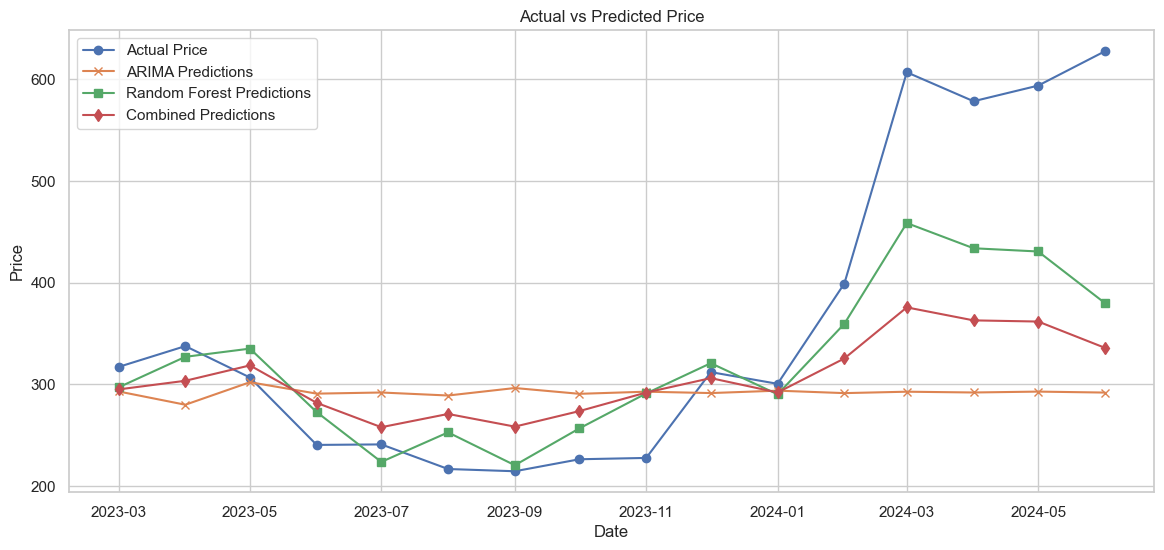

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(test['Date'], test['Price'], label='Actual Price', marker='o')
plt.plot(test['Date'], arima_predictions, label='ARIMA Predictions', marker='x')
plt.plot(test['Date'], rf_predictions, label='Random Forest Predictions', marker='s')
plt.plot(test['Date'], combined_predictions, label='Combined Predictions', marker='d')
plt.title('Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
#searching best parameters for the model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ARIMA model
arima_model = ARIMA(train['Price'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.forecast(steps=len(test))



In [9]:
#scaling data and parameters selection

features = ['Open', 'High', 'Low', 'Vol.', 'Price_Range', 'Price_Change', 'Daily_Return', 'Volume_Change', 'MA_7', 'MA_30', 'Vol_MA_7', 'Vol_MA_30', 'Price_Volatility_7', 'Price_Volatility_30', 'Lag_1', 'Lag_2']
X_train, y_train = train[features], train['Price']
X_test, y_test = test[features], test['Price']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

In [10]:
#new model implementation

rf_model = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f'Best parameters from GridSearchCV: {best_params}')

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


C:\Users\Vahe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters from GridSearchCV: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


C:\Users\Vahe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [11]:
#checking performance

mae_arima = mean_absolute_error(test['Price'], arima_predictions)
rmse_arima = mean_squared_error(test['Price'], arima_predictions, squared=False)
mae_rf = mean_absolute_error(test['Price'], rf_predictions)
rmse_rf = mean_squared_error(test['Price'], rf_predictions, squared=False)
mae_combined = mean_absolute_error(test['Price'], combined_predictions)
rmse_combined = mean_squared_error(test['Price'], combined_predictions, squared=False)

print(f'ARIMA Mean Absolute Error: {mae_arima}')
print(f'ARIMA Root Mean Squared Error: {rmse_arima}')
print(f'Random Forest Mean Absolute Error: {mae_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Combined Mean Absolute Error: {mae_combined}')
print(f'Combined Root Mean Squared Error: {rmse_combined}')

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=tscv, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Random Forest: {-np.mean(cv_scores)}')



ARIMA Mean Absolute Error: 115.24398398762041
ARIMA Root Mean Squared Error: 163.07340912838472
Random Forest Mean Absolute Error: 62.91387812500014
Random Forest Root Mean Squared Error: 95.25389756817142
Combined Mean Absolute Error: 87.16918497902006
Combined Root Mean Squared Error: 127.33194086316573


C:\Users\Vahe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Vahe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Vahe\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegr

Cross-validated MAE for Random Forest: 62.84490799999996


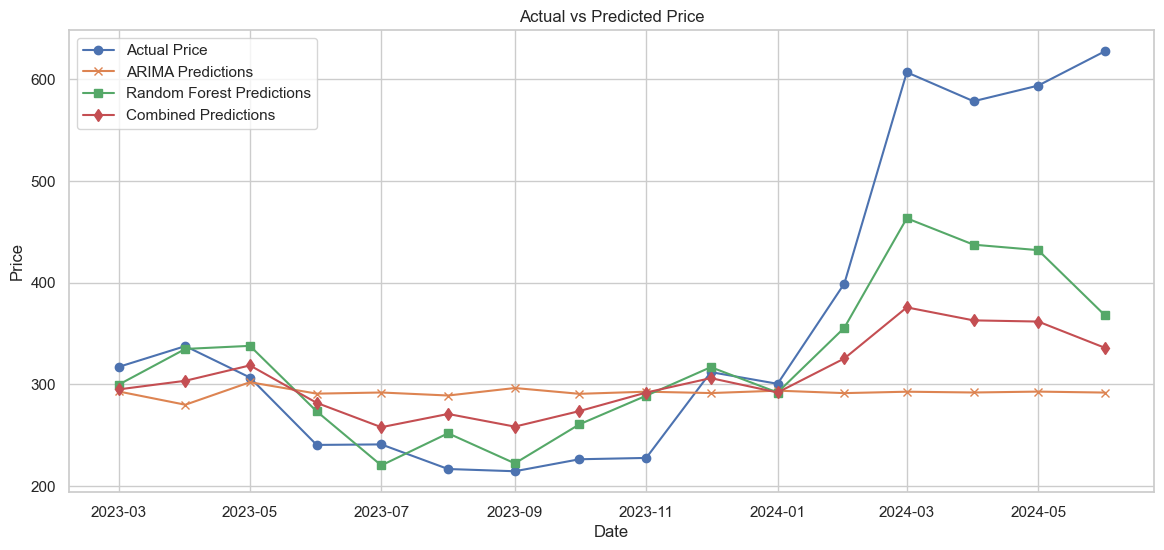

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(test['Date'], test['Price'], label='Actual Price', marker='o')
plt.plot(test['Date'], arima_predictions, label='ARIMA Predictions', marker='x')
plt.plot(test['Date'], rf_predictions, label='Random Forest Predictions', marker='s')
plt.plot(test['Date'], combined_predictions, label='Combined Predictions', marker='d')
plt.title('Actual vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Making future predictions

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


df_monthly = df.resample('M', on='Date').mean()

model = ARIMA(df_monthly['Price'], order=(5,1,0))
model_fit = model.fit()

# future predictions for the next 3 months
forecast_steps = 3
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Date': forecast_index, 'Price': forecast.predicted_mean})


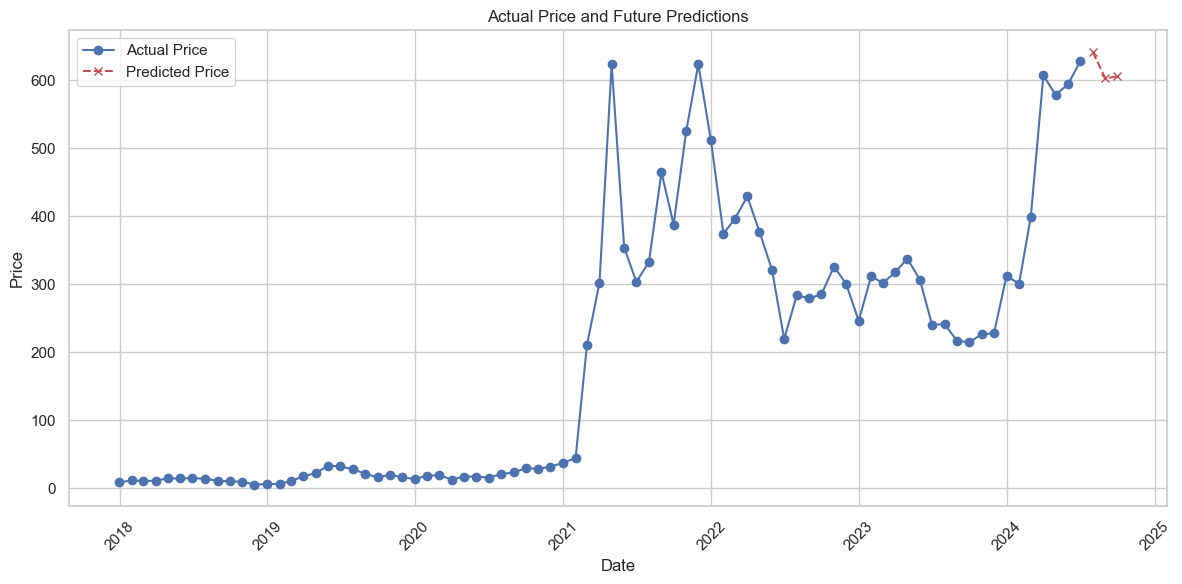

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Price'], marker='o', linestyle='-', color='b', label='Actual Price')
plt.plot(forecast_df['Date'], forecast_df['Price'], marker='x', linestyle='--', color='r', label='Predicted Price')
plt.title('Actual Price and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
pip install pmdarima  #module that uses automatically best parameters for Arima model



   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 991.0 kB/s eta 0:00:01
   ------- -------------------------------- 122.9/614.7 kB 1.8 MB/s eta 0:00:01
   --------------- ------------------------ 235.5/614.7 kB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/614.7 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 419.8/614.7 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.8 MB 11.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/2.8 MB 7.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.8 MB 4.6 MB/s et

C:\Users\Vahe\AppData\Local\Temp\ipykernel_12008\1093300366.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly = df_monthly.fillna(method='ffill')
C:\Users\Vahe\AppData\Local\Temp\ipykernel_12008\1093300366.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_weekly.fillna(method='ffill')


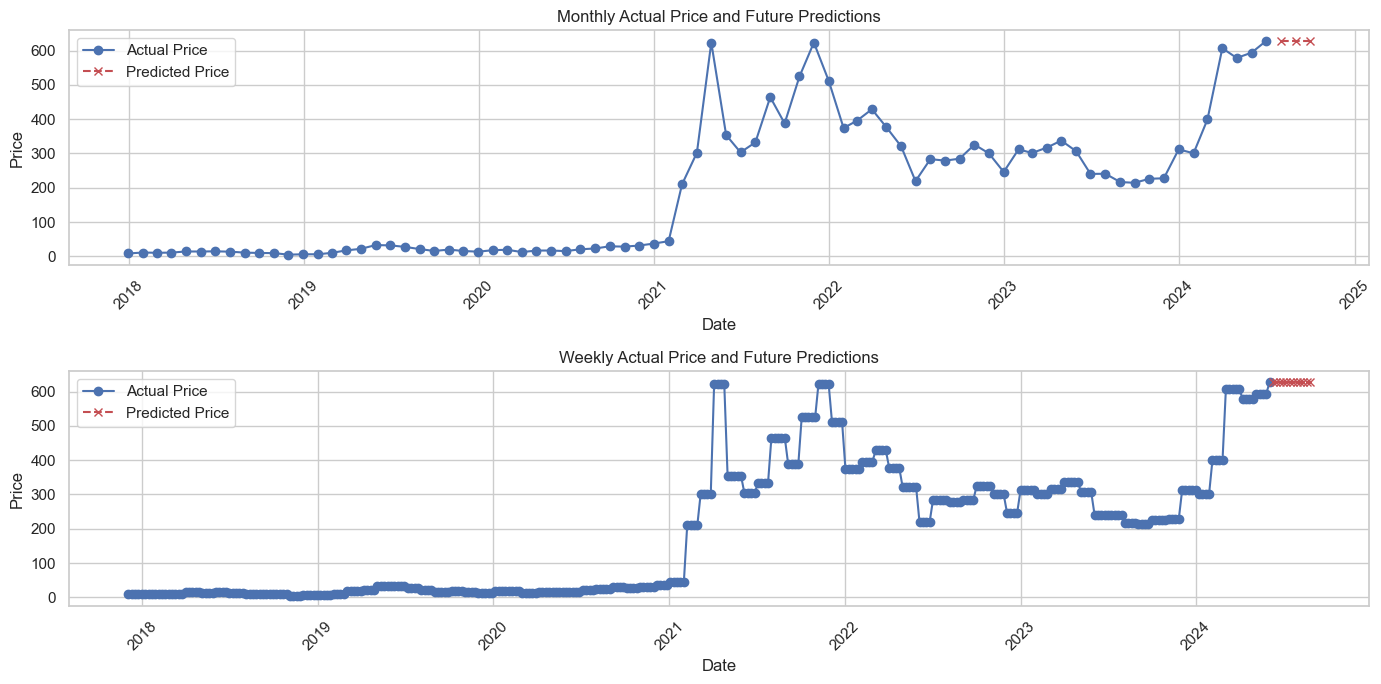

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima


# Aggregating by month and week
df_monthly = df.resample('M', on='Date').mean()
df_weekly = df.resample('W', on='Date').mean()

# Filling Nan with the previous value (forward fill)
df_monthly = df_monthly.fillna(method='ffill')
df_weekly = df_weekly.fillna(method='ffill')

# Fit auto ARIMA model (monthly)
model_monthly = auto_arima(df_monthly['Price'], seasonal=False, stepwise=True)
forecast_steps_monthly = 3
forecast_monthly = model_monthly.predict(n_periods=forecast_steps_monthly)
forecast_index_monthly = pd.date_range(start=df_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps_monthly, freq='M')
forecast_df_monthly = pd.DataFrame({'Date': forecast_index_monthly, 'Price': forecast_monthly})

# Fit auto ARIMA model (weekly)
model_weekly = auto_arima(df_weekly['Price'], seasonal=False, stepwise=True)
forecast_steps_weekly = 12
forecast_weekly = model_weekly.predict(n_periods=forecast_steps_weekly)
forecast_index_weekly = pd.date_range(start=df_weekly.index[-1] + pd.DateOffset(weeks=1), periods=forecast_steps_weekly, freq='W')
forecast_df_weekly = pd.DataFrame({'Date': forecast_index_weekly, 'Price': forecast_weekly})

# Plotting
plt.figure(figsize=(14, 7))

# Plotting Monthly Data
plt.subplot(2, 1, 1)
plt.plot(df_monthly.index, df_monthly['Price'], marker='o', linestyle='-', color='b', label='Actual Price')
plt.plot(forecast_df_monthly['Date'], forecast_df_monthly['Price'], marker='x', linestyle='--', color='r', label='Predicted Price')
plt.title('Monthly Actual Price and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Plotting Weekly Data
plt.subplot(2, 1, 2)
plt.plot(df_weekly.index, df_weekly['Price'], marker='o', linestyle='-', color='b', label='Actual Price')
plt.plot(forecast_df_weekly['Date'], forecast_df_weekly['Price'], marker='x', linestyle='--', color='r', label='Predicted Price')
plt.title('Weekly Actual Price and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [29]:
forecast_df_weekly['Price']

2024-06-09    627.58
2024-06-16    627.58
2024-06-23    627.58
2024-06-30    627.58
2024-07-07    627.58
2024-07-14    627.58
2024-07-21    627.58
2024-07-28    627.58
2024-08-04    627.58
2024-08-11    627.58
2024-08-18    627.58
2024-08-25    627.58
Freq: W-SUN, Name: Price, dtype: float64

In [30]:
forecast_df_monthly['Price']

2024-07-31    627.58
2024-08-31    627.58
2024-09-30    627.58
Freq: M, Name: Price, dtype: float64